In [1]:
import numpy as np
import copy
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from matplotlib.colors import LogNorm
import plotly.graph_objects as go
import geopandas as gpd
from shapely.geometry import Point
warnings.filterwarnings('ignore')

In [14]:
origin = pd.read_csv('/Users/thinhcn/Desktop/Weekly project/Week 3/terrorism.csv', encoding="latin-1")

#  Cleaning data

In [15]:
origin.shape
# table of 181691 rows and 135  cols

(181691, 135)

In [16]:
# check NA, there are many columns with NA that we will not need for this analysis
isnull = origin.isnull().sum().sort_values(ascending = False)
isnull

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
attacktype1              0
suicide                  0
success                  0
crit3                    0
eventid                  0
Length: 135, dtype: int64

In [17]:
# upon investigation, these cols are relevant to our analysis, so we will extract data from these cols and work on it
keep = ['eventid', 'iyear', 'imonth', 'iday',
       'country_txt', 'region_txt', 'city', 'latitude',
       'longitude','location', 'summary',
       'multiple', 'success', 'suicide', 'attacktype1_txt',
        'targtype1_txt','corp1', 'target1', 'natlty1_txt', 'gname', 'motive',
        'individual', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus',
        'nwound', 'nwoundus']

In [19]:
data = origin[keep]
data.head()

eventid  iyear  imonth  iday         country_txt  \
0  1.970000e+11   1970       7     2  Dominican Republic   
1  1.970000e+11   1970       0     0              Mexico   
2  1.970010e+11   1970       1     0         Philippines   
3  1.970010e+11   1970       1     0              Greece   
4  1.970010e+11   1970       1     0               Japan   

                    region_txt           city   latitude   longitude location  \
0  Central America & Caribbean  Santo Domingo  18.456792  -69.951164      NaN   
1                North America    Mexico city  19.371887  -99.086624      NaN   
2               Southeast Asia        Unknown  15.478598  120.599741      NaN   
3               Western Europe         Athens  37.997490   23.762728      NaN   
4                    East Asia        Fukouka  33.580412  130.396361      NaN   

   ... motive  individual  weaptype1_txt  weapsubtype1  \
0  ...    NaN           0        Unknown           NaN   
1  ...    NaN           0        Unknown           NaN   
2  ...    NaN           0        Unknown           NaN   
3  ...    NaN           0     Explosives          16.0   
4  ...    NaN           0     Incendiary           NaN   

         weapsubtype1_txt  weapdetail nkill nkillus nwound nwoundus  
0                     NaN         NaN   1.0     NaN    0.0      NaN  
1                     NaN         NaN   0.0     NaN    0.0      NaN  
2                     NaN         NaN   1.0     NaN    0.0      NaN  
3  Unknown Explosive Type   Explosive   NaN     NaN    NaN      NaN  
4                     NaN  Incendiary   NaN     NaN    NaN      NaN  

[5 rows x 30 columns]

# Data Analysis

## 1. Attack breakdown by year and region

In [21]:
year = data.groupby('iyear')[['eventid']].count()
year.head(10)

eventid
iyear         
1970       651
1971       471
1972       568
1973       473
1974       581
1975       740
1976       923
1977      1319
1978      1526
1979      2662

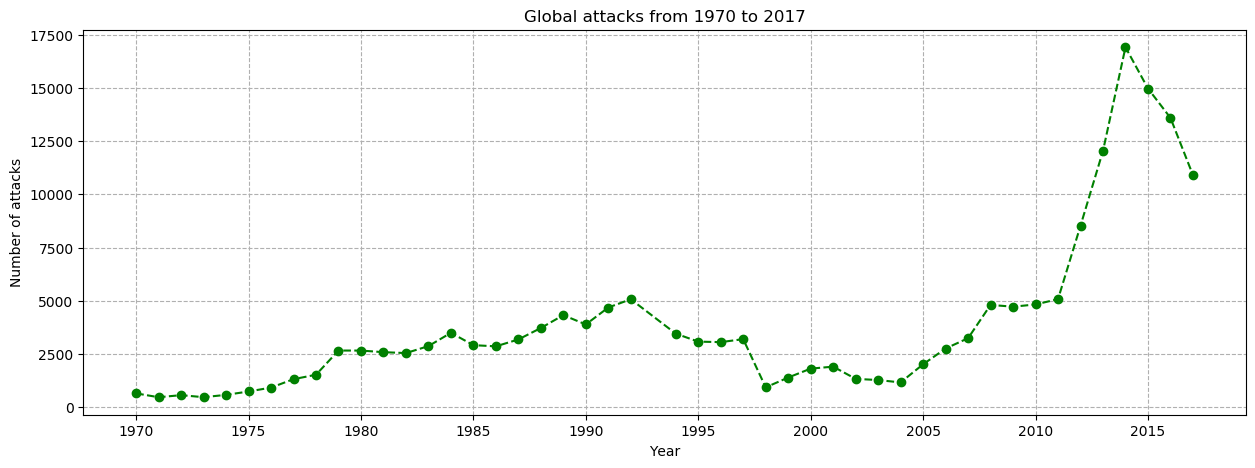

In [33]:
plt.style.use("default")
fig = plt.figure(figsize = (15,5))
plt.plot(year, 'go--')
plt.xlabel("Year", )
plt.ylabel("Number of attacks")
plt.xticks (np.arange(1970,2020,5))
plt.title ('Global attacks from 1970 to 2017')
plt.grid(linestyle='--')
plt.show()

In [28]:
attack_by_region = data['region_txt'].value_counts()
attack_by_region

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

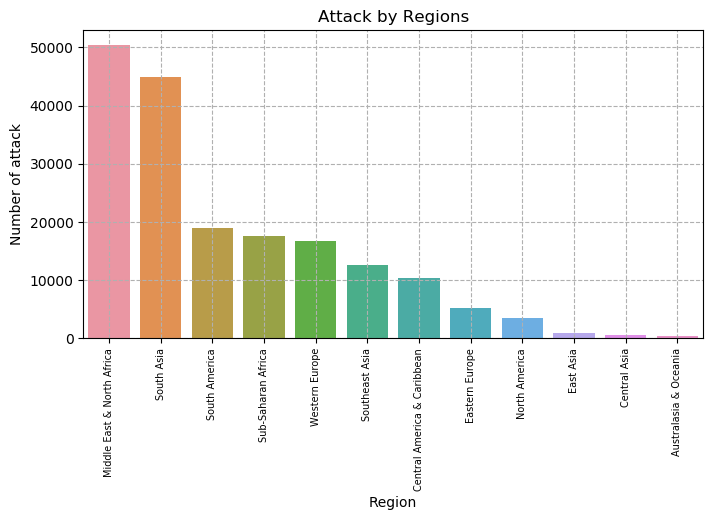

In [48]:
fig = plt.figure(figsize = (8,4))
sns.barplot(attack_by_region.index, attack_by_region)
plt.xticks(rotation = 90, fontsize = 7)
plt.xlabel("Region")
plt.ylabel("Number of attack")
plt.title("Attack by Regions")
plt.grid(linestyle='--')
plt.show()

In [45]:
terror_region = pd.crosstab(data.iyear,data.region_txt)
terror_region.head(10)

region_txt  Australasia & Oceania  Central America & Caribbean  Central Asia  \
iyear                                                                          
1970                            1                            7             0   
1971                            1                            5             0   
1972                            8                            3             0   
1973                            1                            6             0   
1974                            1                           11             0   
1975                            0                            9             0   
1976                            0                           45             0   
1977                            0                           24             0   
1978                            2                          199             0   
1979                            2                          609             0   

region_txt  East Asia  Eastern Europe  Middle East & North Africa  \
iyear                                                               
1970                2              12                          28   
1971                1               5                          55   
1972                0               1                          53   
1973                2               1                          19   
1974                4               2                          42   
1975               12               0                          44   
1976                2               0                          55   
1977                4               2                         211   
1978               35               2                         128   
1979               16               1                         455   

region_txt  North America  South America  South Asia  Southeast Asia  \
iyear                                                                  
1970                  472             65           1              10   
1971                  247             24           0               6   
1972                   73             33           1              16   
1973                   64             83           1               2   
1974                  111             81           2               3   
1975                  159             55           4               7   
1976                  125             91           4              12   
1977                  149            119           2               8   
1978                  117            222           2              44   
1979                   79            236          34              86   

region_txt  Sub-Saharan Africa  Western Europe  
iyear                                           
1970                         3              50  
1971                         2             125  
1972                         4             376  
1973                         4             290  
1974                         7             317  
1975                        12             438  
1976                        11             578  
1977                        29             771  
1978                        46             729  
1979                       124            1020

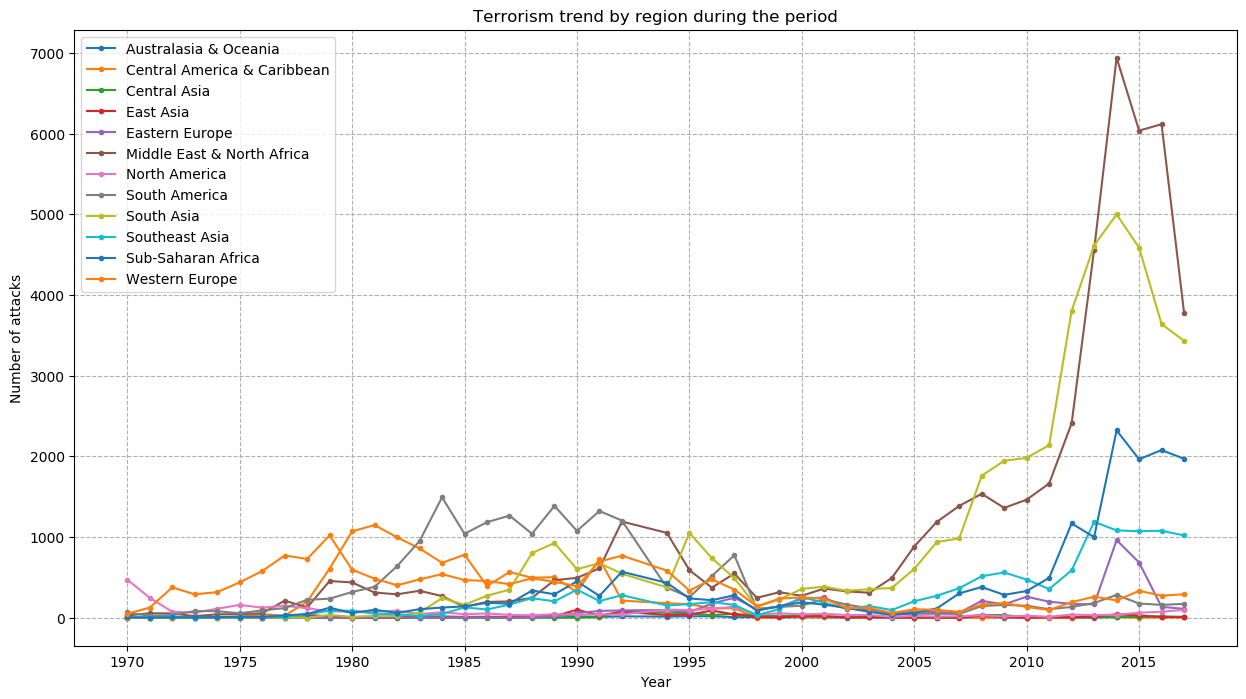

In [50]:
fig = plt.figure(figsize = (15,8))
plt.plot(terror_region, marker = '.')
plt.title("Terrorism trend by region during the period")
plt.xlabel("Year", )
plt.ylabel("Number of attacks")
plt.xticks(np.arange(1970,2020,5))
plt.legend(terror_region.columns,loc='upper left')
plt.grid(linestyle='--')
plt.show()

In [60]:
top20 = data['country_txt'].value_counts().head(20)
top20

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country_txt, dtype: int64

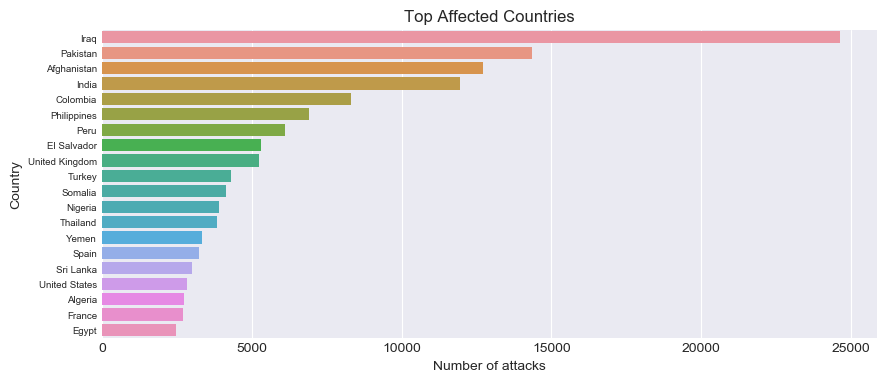

In [152]:
fig = plt.figure(figsize=(10,4))
sns.barplot(top20,top20.index)
plt.xticks(rotation = 0, fontsize = 10)
plt.yticks(fontsize = 7)
plt.ylabel("Country")
plt.xlabel("Number of attacks")
plt.title('Top Affected Countries')
plt.show()

## 2. Casuality vs. Attacks by year and region

In [79]:
# create another feature: ncalsualty = nkill + nwound
data['ncasualty'] = data['nkill']+ data['nwound']
data.head()

eventid  iyear  imonth  iday         country_txt  \
0  1.970000e+11   1970       7     2  Dominican Republic   
1  1.970000e+11   1970       0     0              Mexico   
2  1.970010e+11   1970       1     0         Philippines   
3  1.970010e+11   1970       1     0              Greece   
4  1.970010e+11   1970       1     0               Japan   

                    region_txt           city   latitude   longitude location  \
0  Central America & Caribbean  Santo Domingo  18.456792  -69.951164      NaN   
1                North America    Mexico city  19.371887  -99.086624      NaN   
2               Southeast Asia        Unknown  15.478598  120.599741      NaN   
3               Western Europe         Athens  37.997490   23.762728      NaN   
4                    East Asia        Fukouka  33.580412  130.396361      NaN   

   ... weaptype1_txt  weapsubtype1        weapsubtype1_txt  weapdetail nkill  \
0  ...       Unknown           NaN                     NaN         NaN   1.0   
1  ...       Unknown           NaN                     NaN         NaN   0.0   
2  ...       Unknown           NaN                     NaN         NaN   1.0   
3  ...    Explosives          16.0  Unknown Explosive Type   Explosive   NaN   
4  ...    Incendiary           NaN                     NaN  Incendiary   NaN   

  nkillus nwound nwoundus casualties ncasualty  
0     NaN    0.0      NaN        1.0       1.0  
1     NaN    0.0      NaN        0.0       0.0  
2     NaN    0.0      NaN        1.0       1.0  
3     NaN    NaN      NaN        NaN       NaN  
4     NaN    NaN      NaN        NaN       NaN  

[5 rows x 32 columns]

In [103]:
# creating an interactive map to visualize

groupedcasualties = data.groupby(['country_txt'])[["nwound", "nkill", "ncasualty",]].sum(min_count=1)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
result = pd.merge(left= groupedcasualties, right=df, how='left',  left_on='country_txt', right_on='COUNTRY')

fig = go.Figure(data=go.Choropleth(
    locations =result['CODE'],
    z = result['ncasualty'],
    text = result['CODE'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Casualties of Terrorist Events',
))

fig.update_layout(
    title_text='Casualties of Terrorist Events',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Casualties around the world',
        
        showarrow = False
    )]
)

fig.show()

In [104]:
casualty_data = data.groupby('region_txt')[['nkill','nwound','ncasualty']].sum().sort_values(by = 'ncasualty',ascending = False)
casualty_data

nkill    nwound  ncasualty
region_txt                                                
Middle East & North Africa   137642.0  214308.0   329807.0
South Asia                   101319.0  141360.0   234366.0
Sub-Saharan Africa            78386.0   52857.0   108990.0
South America                 28849.0   16704.0    43562.0
Southeast Asia                15637.0   26259.0    40841.0
Central America & Caribbean   28708.0    8991.0    34530.0
North America                  4916.0   21531.0    26398.0
Western Europe                 6694.0   18332.0    22778.0
Eastern Europe                 7415.0   12045.0    18239.0
East Asia                      1152.0    9213.0    10003.0
Central Asia                   1000.0    2009.0     2969.0
Australasia & Oceania           150.0     260.0      409.0

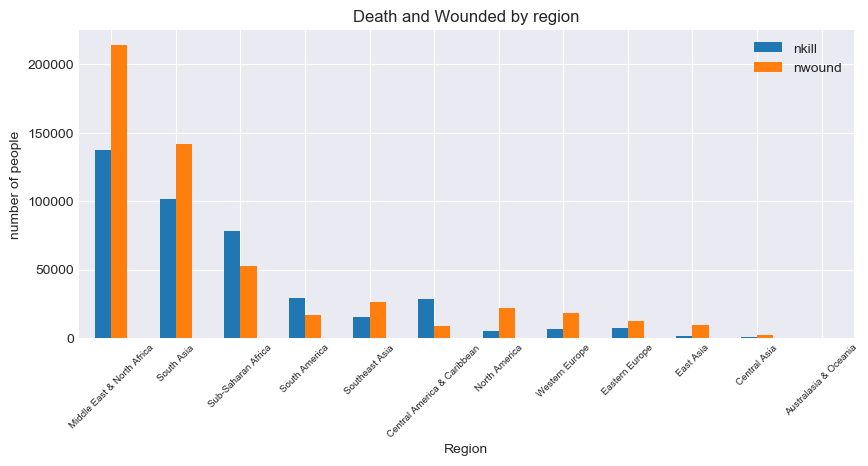

In [105]:
ax = casualty_data[['nkill','nwound']].plot(kind = 'bar', stacked = False, figsize = (10,4))
ax.set(xlabel = 'Region', ylabel = 'number of people',  title = "Death and Wounded by region" )
plt.style.use('seaborn-darkgrid')
plt.xticks(rotation = 45, fontsize = 7)
plt.show()

In [107]:
country_casualty = data.groupby('country_txt')[['ncasualty','nkill','nwound']].sum().sort_values(by = 'ncasualty', ascending = False)
country_casualty

ncasualty    nkill    nwound
country_txt                                      
Iraq                  202982.0  78589.0  134690.0
Afghanistan            80213.0  39384.0   44277.0
Pakistan               64427.0  23822.0   42038.0
India                  47108.0  19341.0   28980.0
Sri Lanka              29792.0  15530.0   15561.0
...                        ...      ...       ...
Andorra                    0.0      0.0       0.0
Iceland                    0.0      0.0       0.0
New Hebrides               0.0      0.0       0.0
Seychelles                 0.0      0.0       0.0
Antigua and Barbuda        0.0      0.0       0.0

[205 rows x 3 columns]

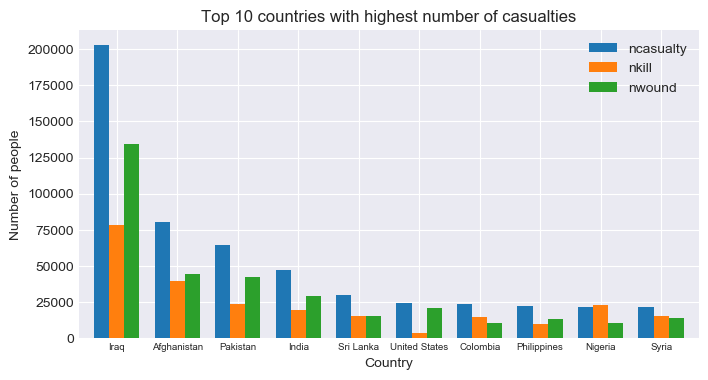

In [115]:
# top 10 affected countries
ax = country_casualty.head(10).plot(kind = 'bar', stacked = False, figsize = (8,4), width = 0.75)
ax.set(xlabel = "Country", ylabel = "Number of people", title = "Top 10 countries with highest number of casualties")
plt.style.use('seaborn-darkgrid')
plt.xticks(rotation = 0, fontsize = 7)
plt.show()

## 3. Attack methods

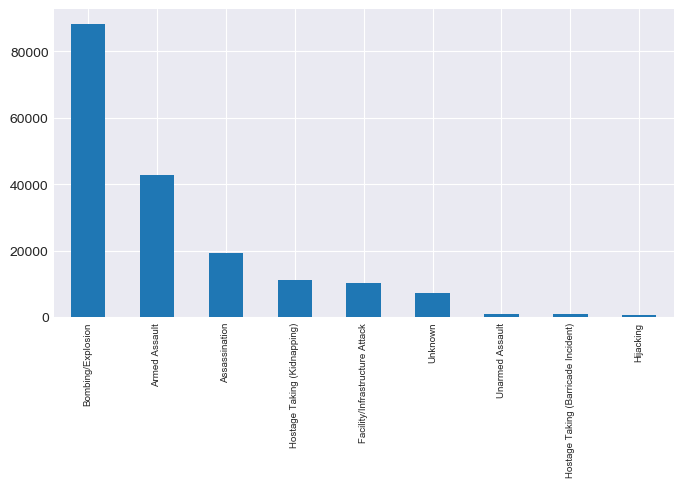

In [119]:
data.attacktype1_txt.value_counts().plot(kind = 'bar', figsize = (8,4))
plt.style.use('seaborn-darkgrid')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

In [122]:
attack_method = data.attacktype1_txt.value_counts()
attack_method

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

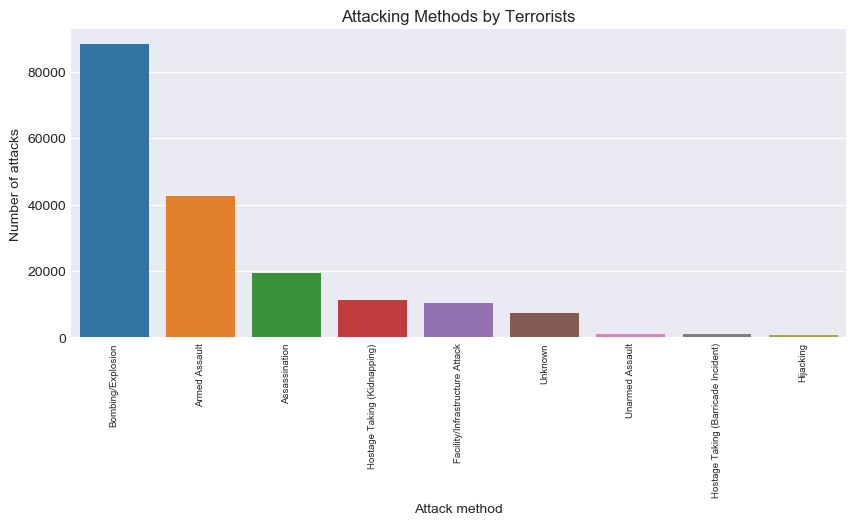

In [143]:
fig = plt.figure(figsize=(10,4))
sns.barplot(attack_method.index, attack_method)
plt.xticks(rotation = 90, fontsize = 7)
plt.xlabel("Attack method")
plt.ylabel("Number of attacks")
plt.style.use('seaborn-darkgrid')
plt.title("Attacking Methods by Terrorists")
plt.show()

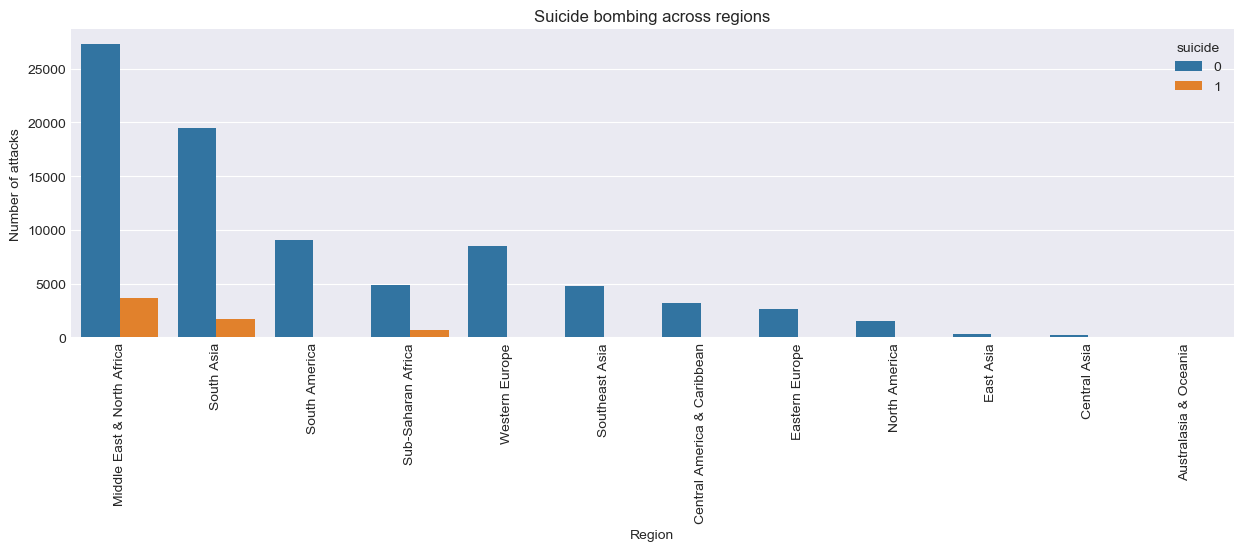

In [142]:
# Suicide bombing across regions
fig = plt.figure(figsize=(15,4))
sns.countplot(data = data[data.attacktype1_txt == "Bombing/Explosion"], x = "region_txt", hue = 'suicide',
             order = data['region_txt'].value_counts().index)
plt.xticks(rotation = 90)
plt.title('Suicide bombing across regions')
plt.xlabel("Region")
plt.ylabel("Number of attacks")
plt.show()

## 4. Weapon type

In [165]:
weapon_type = pd.crosstab(data.weaptype1_txt,data.region_txt)
weapon_type

region_txt                                          Australasia & Oceania  \
weaptype1_txt                                                               
Biological                                                              0   
Chemical                                                               11   
Explosives                                                             80   
Fake Weapons                                                            0   
Firearms                                                               74   
Incendiary                                                             74   
Melee                                                                  10   
Other                                                                   1   
Radiological                                                            0   
Sabotage Equipment                                                      0   
Unknown                                                                31   
Vehicle (not to include vehicle-borne explosive...                      1   

region_txt                                          Central America & Caribbean  \
weaptype1_txt                                                                     
Biological                                                                    0   
Chemical                                                                      2   
Explosives                                                                 3149   
Fake Weapons                                                                  0   
Firearms                                                                   5679   
Incendiary                                                                  435   
Melee                                                                        65   
Other                                                                         0   
Radiological                                                                  0   
Sabotage Equipment                                                            5   
Unknown                                                                    1005   
Vehicle (not to include vehicle-borne explosive...                            4   

region_txt                                          Central Asia  East Asia  \
weaptype1_txt                                                                 
Biological                                                     0          2   
Chemical                                                       2         17   
Explosives                                                   254        333   
Fake Weapons                                                   1          4   
Firearms                                                     232         41   
Incendiary                                                    15        252   
Melee                                                         14         82   
Other                                                          0          3   
Radiological                                                   0         10   
Sabotage Equipment                                             0          3   
Unknown                                                       45         47   
Vehicle (not to include vehicle-borne explosive...             0          8   

region_txt                                          Eastern Europe  \
weaptype1_txt                                                        
Biological                                                       0   
Chemical                                                        12   
Explosives                                                    3089   
Fake Weapons                                                     4   
Firearms                                                      1461   
Incendiary                                                     186   
Melee                                                           90   
Other                

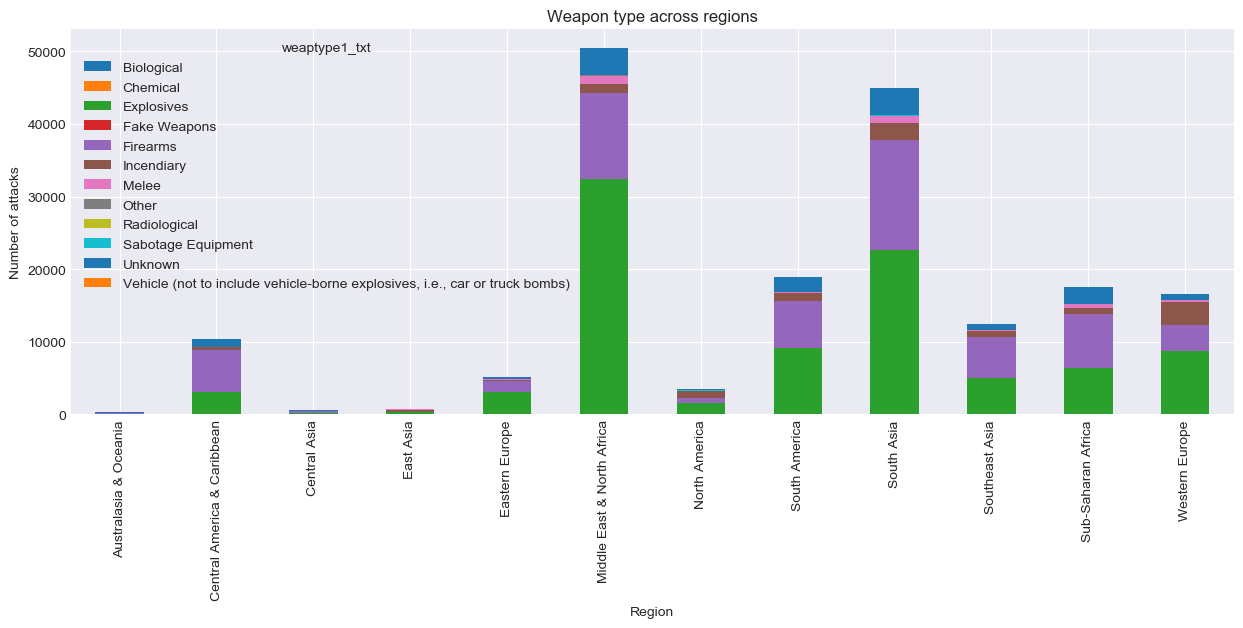

In [177]:
ax = weapon_type.T.plot.bar(stacked=True,width=0.5, figsize = (15,5))
plt.xticks(rotation = 90)
plt.title('Weapon type across regions')
plt.xlabel("Region")
plt.ylabel("Number of attacks")
plt.show()

## 5. Attack group

In [178]:
pouplar_group = data.gname.value_counts()
pouplar_group.head(16)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Name: gname, dtype: int64

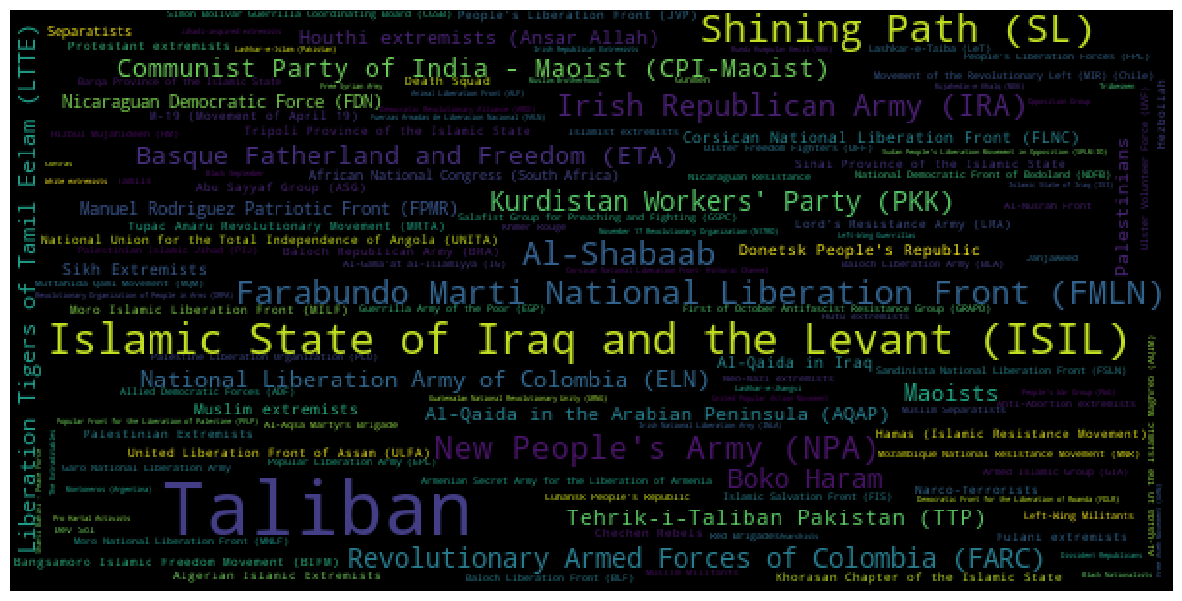

In [183]:
from PIL import Image
from wordcloud import WordCloud 

gname_dict = dict(data.gname.value_counts()[1:])
gname_dict = dict(pouplar_group[1:])
wordcloud = WordCloud(width = 600, height = 300).generate_from_frequencies(gname_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

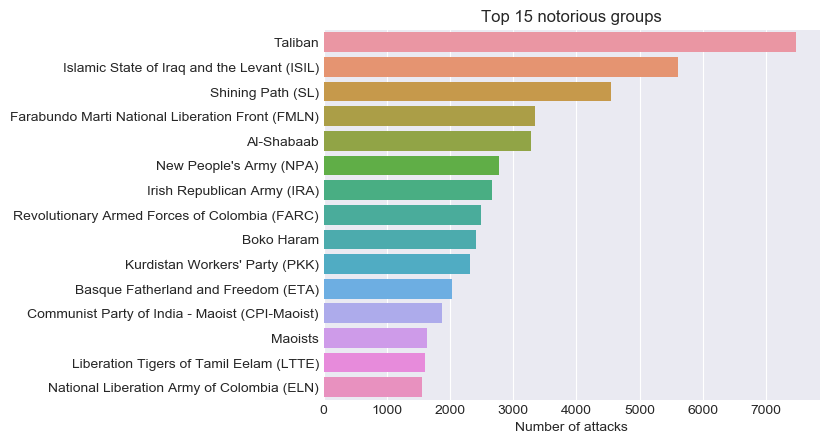

In [181]:
sns.barplot(pouplar_group[1:16],pouplar_group[1:16].index)
plt.xticks(rotation = 0)
plt.title('Top 15 notorious groups')
plt.xlabel("Number of attacks")
plt.show()

## 6. Popular targets

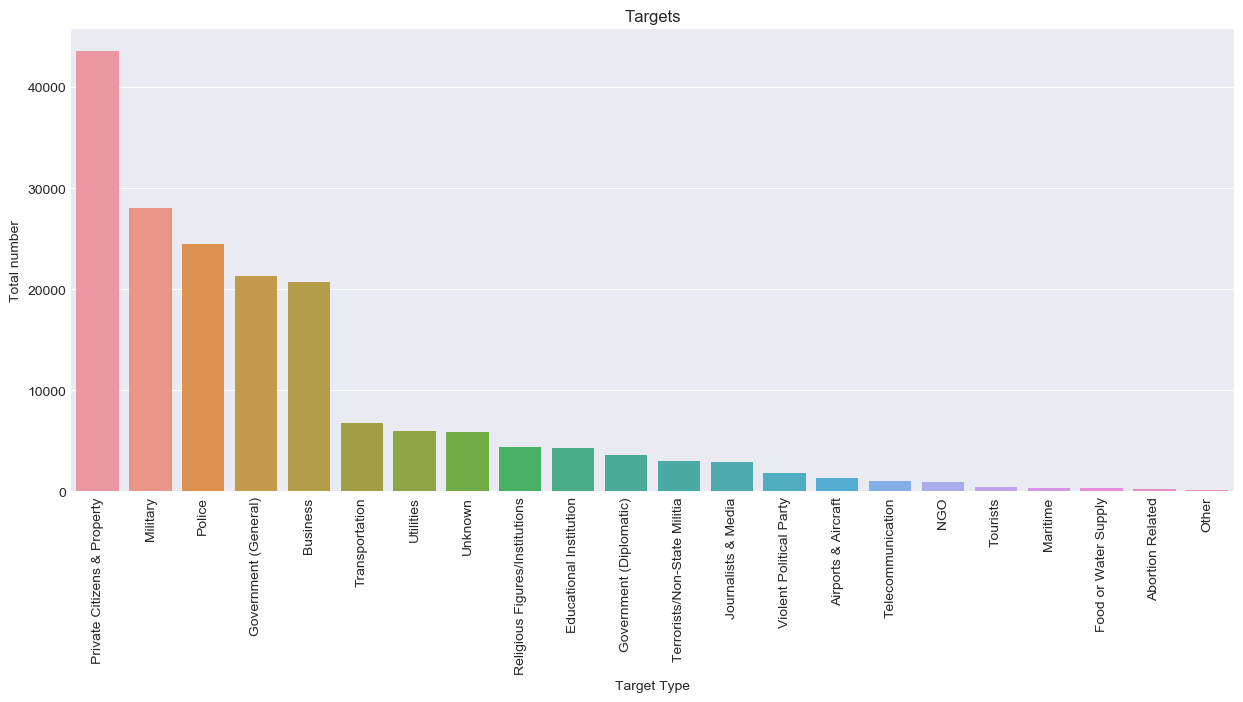

In [184]:
plt.subplots(figsize=(15,6))
sns.countplot(data['targtype1_txt'],order=data['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Target Type")
plt.ylabel("Total number")
plt.title('Targets')
plt.show()